In [4]:
import pandas as pd


In [117]:
a = {'country':'india', 
     'capital':'delhi', 
     'currency':'INR',
     'GDP' : 7860
    }
type(a)

dict

In [118]:
b = {'country':'pakistan', 'capital':'islamabad', 'currency': 'PKR',
     'GDP' : 3860}


In [119]:
c = {'country':'sri lanka', 'capital':'colombo', 'currency':'lankan rupee',
     'GDP' : 456}


In [120]:
data =[a,b,c]
data

[{'GDP': 7860, 'capital': 'delhi', 'country': 'india', 'currency': 'INR'},
 {'GDP': 3860,
  'capital': 'islamabad',
  'country': 'pakistan',
  'currency': 'PKR'},
 {'GDP': 456,
  'capital': 'colombo',
  'country': 'sri lanka',
  'currency': 'lankan rupee'}]

In [141]:
df = pd.DataFrame(data, columns=['country', 'capital', 'currency', 'GDP'])
df

,country,capital,currency,GDP
0,india,delhi,INR,7860
1,pakistan,islamabad,PKR,3860
2,sri lanka,colombo,lankan rupee,456


In [192]:
df_piv = df.pivot(index="capital" , columns="currency", values= 'GDP')
print("\n----")
print(df_piv.head())

df_melt = pd.melt(df, id_vars=['country','capital'], value_vars=['currency' ,'GDP'])
print("\n----")
print(df_melt)

df_pivot2 = df.pivot(columns="capital")
print("\n----")
print(df_pivot2)



----
currency      INR     PKR  lankan rupee
capital                                
colombo       NaN     NaN         456.0
delhi      7860.0     NaN           NaN
islamabad     NaN  3860.0           NaN

----
     country    capital  variable         value
0      india      delhi  currency           INR
1   pakistan  islamabad  currency           PKR
2  sri lanka    colombo  currency  lankan rupee
3      india      delhi       GDP          7860
4   pakistan  islamabad       GDP          3860
5  sri lanka    colombo       GDP           456

----
           country                       currency                     GDP  \
capital    colombo  delhi islamabad       colombo delhi islamabad colombo   
0             None  india      None          None   INR      None     NaN   
1             None   None  pakistan          None  None       PKR     NaN   
2        sri lanka   None      None  lankan rupee  None      None   456.0   

                           
capital   delhi islamabad  
0   

Index(['india', 'pakistan', 'sri lanka'], dtype='object', name='country')

In [207]:

df_index = df.set_index('country')
print("\n----")
print(df_index)
df_index.index.names
df_index.head()


----
             capital      currency   GDP
country                                 
india          delhi           INR  7860
pakistan   islamabad           PKR  3860
sri lanka    colombo  lankan rupee   456


,capital,currency,GDP
country,,,
india,delhi,INR,7860
pakistan,islamabad,PKR,3860
sri lanka,colombo,lankan rupee,456


In [210]:
df_index1 = df.set_index(['country', 'capital'])
print("\n----")
print(df_index1)
df_index1.index.names
df_index1.head()


----
                         currency   GDP
country   capital                      
india     delhi               INR  7860
pakistan  islamabad           PKR  3860
sri lanka colombo    lankan rupee   456


,,currency,GDP
country,capital,,
india,delhi,INR,7860
pakistan,islamabad,PKR,3860
sri lanka,colombo,lankan rupee,456


In [211]:
df_us = df_index1.unstack('capital')
print("\n----")
df_us.head()

df.set_index()
#df_us.index


----


currency                     GDP                  
capital         colombo delhi islamabad colombo   delhi islamabad
country                                                          
india              None   INR      None     NaN  7860.0       NaN
pakistan           None  None       PKR     NaN     NaN    3860.0
sri lanka  lankan rupee  None      None   456.0     NaN       NaN

In [230]:
df_us2 = df_index1.unstack(level=0)
print("\n----")
df_us2.head()

#df_us.index


----


currency                            GDP                   
country      india pakistan     sri lanka   india pakistan sri lanka
capital                                                             
colombo       None     None  lankan rupee     NaN      NaN     456.0
delhi          INR     None          None  7860.0      NaN       NaN
islamabad     None      PKR          None     NaN   3860.0       NaN

In [227]:
df_st= df_us2.stack(level=0)
print("\n----")
df_st.head()

#df_us.index


----


country            india pakistan     sri lanka
capital                                        
colombo   currency  None     None  lankan rupee
          GDP        NaN      NaN           456
delhi     currency   INR     None          None
          GDP       7860      NaN           NaN
islamabad currency  None      PKR          None

In [233]:
df_us3 = df_st.swaplevel(0,1)
print("\n----")
df_us3.head()

#df_us.index


----


,country,india,pakistan,sri lanka
,capital,,,
currency,colombo,None,None,lankan rupee
GDP,colombo,NaN,NaN,456
currency,delhi,INR,None,None
GDP,delhi,7860,NaN,NaN
currency,islamabad,None,PKR,None


In [236]:
df_us3.sort_index()
df_us3.head(9)

,country,india,pakistan,sri lanka
,capital,,,
currency,colombo,None,None,lankan rupee
GDP,colombo,NaN,NaN,456
currency,delhi,INR,None,None
GDP,delhi,7860,NaN,NaN
currency,islamabad,None,PKR,None
GDP,islamabad,NaN,3860,NaN


In [234]:
df_us4 = df_us3.swaplevel(0,1)
print("\n----")
df_us4.head()

#df_us.index


----


country            india pakistan     sri lanka
capital                                        
colombo   currency  None     None  lankan rupee
          GDP        NaN      NaN           456
delhi     currency   INR     None          None
          GDP       7860      NaN           NaN
islamabad currency  None      PKR          None

In [237]:
df_us4.sort_index()
df_us4.head(9)

country            india pakistan     sri lanka
capital                                        
colombo   currency  None     None  lankan rupee
          GDP        NaN      NaN           456
delhi     currency   INR     None          None
          GDP       7860      NaN           NaN
islamabad currency  None      PKR          None
          GDP        NaN     3860           NaN

In [50]:
df

,country,capital
0,india,NaN
1,pakistan,NaN
2,nepal,NaN
3,sri lanka,NaN
4,NaN,"(delhi, islamabad, kathmandu, colombo)"


In [5]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [7]:
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [10]:
drinks.beer_servings.mean()

106.16062176165804

In [13]:
print(drinks.groupby('continent').beer_servings.mean())

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64


In [30]:
drinks.groupby('continent').agg(['count'])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
,count,count,count,count,count
continent,,,,,
Africa,53,53,53,53,53
Asia,44,44,44,44,44
Europe,45,45,45,45,45
North America,23,23,23,23,23
Oceania,16,16,16,16,16
South America,12,12,12,12,12


In [239]:
%matplotlib inline
!pwd
!ls


/home/jovyan/work/Rough
Interactive Widgets.ipynb  Python User Input and Interaction.ipynb
Lab.ipynb		   PyThreejs.ipynb
LeafletDraw.ipynb	   Snippets.ipynb
ML CLass		   widget_examples.ipynb
Pandas Workbook.ipynb	   widgets.ipynb


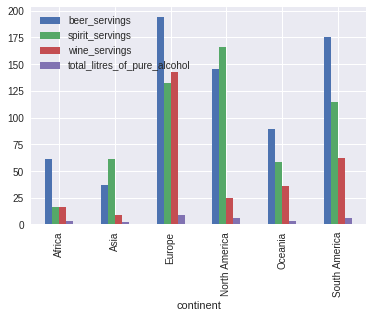

In [33]:
 drinks.groupby('continent').mean().plot(kind='bar')